In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import skew, kurtosis

In [3]:
data = pd.read_csv("./data/stat_gov.csv")
data

,ntfNum,ID,del,ndP3,ntfCmrShort,drQty,ntfPrc,mnn,mnnCnt,href,ntfReg,drSm,ntfDst,drPrc,trd
0,Комм-1092825210,128163027,0,2025-11-30 23:59:00.000,"МУП ""ЦМЗ УСТЬ-ДЖЕГУТИНСКОГО МУНИЦИПАЛЬНОГО РАЙ...",30000.0,1410000.0,Лоперамид,1,https://www.rts-tender.ru/poisk/id/l13969086-3...,Карачаево-Черкесская,1410000.0,Северо-Кавказский,47.0,NaN
1,0338200009825000381,127571407,0,2025-11-30 23:00:00.000,"ГБУЗ ""Камчатская краевая больница им. А.С. Лук...",1500.0,NaN,Йогексол,0,https://zakupki.gov.ru/epz/pricereq/card/commo...,Камчатский,NaN,Дальневосточный,NaN,NaN
2,0338200009825000381,127571406,0,2025-11-30 23:00:00.000,"ГБУЗ ""Камчатская краевая больница им. А.С. Лук...",5000.0,NaN,Йогексол,0,https://zakupki.gov.ru/epz/pricereq/card/commo...,Камчатский,NaN,Дальневосточный,NaN,NaN
3,0338200009825000382,127571395,0,2025-11-30 23:00:00.000,"ГБУЗ ""Камчатская краевая больница им. А.С. Лук...",1500.0,NaN,Амоксициллин+Клавулановая кислота,0,https://zakupki.gov.ru/epz/pricereq/card/commo...,Камчатский,NaN,Дальневосточный,NaN,NaN
4,0338200009825000380,127571374,0,2025-11-30 23:00:00.000,"ГБУЗ ""Камчатская краевая больница им. А.С. Лук...",50.0,NaN,Телаванцин,0,https://zakupki.gov.ru/epz/pricereq/card/commo...,Камчатский,NaN,Дальневосточный,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619716,0322300059125000745,127216533,0,2025-10-31 01:00:00.000,"КГБУЗ ""Городская больница № 7""",200.0,219738.0,Соталол,4,http://zakupki.gov.ru/epz/order/notice/view/co...,Хабаровский,29200.0,Дальневосточный,146.0,NaN
619717,0322300059125000744,127216530,0,2025-10-31 01:00:00.000,"КГБУЗ ""Городская больница № 7""",800.0,308560.0,Дротаверин,3,http://zakupki.gov.ru/epz/order/notice/view/co...,Хабаровский,216400.0,Дальневосточный,270.5,NaN
619718,0322300059125000745,127216500,0,2025-10-31 01:00:00.000,"КГБУЗ ""Городская больница № 7""",80.0,219738.0,Гидрохлоротиазид,4,http://zakupki.gov.ru/epz/order/notice/view/co...,Хабаровский,7504.0,Дальневосточный,93.8,NaN
619719,0322300059125000745,127216470,0,2025-10-31 01:00:00.000,"КГБУЗ ""Городская больница № 7""",200.0,219738.0,Нифедипин,4,http://zakupki.gov.ru/epz/order/notice/view/co...,Хабаровский,22300.0,Дальневосточный,111.5,NaN


In [4]:
data = data[data["del"] == 0]
data = data.drop(columns=["del"])
data

,ntfNum,ID,ndP3,ntfCmrShort,drQty,ntfPrc,mnn,mnnCnt,href,ntfReg,drSm,ntfDst,drPrc,trd
0,Комм-1092825210,128163027,2025-11-30 23:59:00.000,"МУП ""ЦМЗ УСТЬ-ДЖЕГУТИНСКОГО МУНИЦИПАЛЬНОГО РАЙ...",30000.0,1410000.0,Лоперамид,1,https://www.rts-tender.ru/poisk/id/l13969086-3...,Карачаево-Черкесская,1410000.0,Северо-Кавказский,47.0,NaN
1,0338200009825000381,127571407,2025-11-30 23:00:00.000,"ГБУЗ ""Камчатская краевая больница им. А.С. Лук...",1500.0,NaN,Йогексол,0,https://zakupki.gov.ru/epz/pricereq/card/commo...,Камчатский,NaN,Дальневосточный,NaN,NaN
2,0338200009825000381,127571406,2025-11-30 23:00:00.000,"ГБУЗ ""Камчатская краевая больница им. А.С. Лук...",5000.0,NaN,Йогексол,0,https://zakupki.gov.ru/epz/pricereq/card/commo...,Камчатский,NaN,Дальневосточный,NaN,NaN
3,0338200009825000382,127571395,2025-11-30 23:00:00.000,"ГБУЗ ""Камчатская краевая больница им. А.С. Лук...",1500.0,NaN,Амоксициллин+Клавулановая кислота,0,https://zakupki.gov.ru/epz/pricereq/card/commo...,Камчатский,NaN,Дальневосточный,NaN,NaN
4,0338200009825000380,127571374,2025-11-30 23:00:00.000,"ГБУЗ ""Камчатская краевая больница им. А.С. Лук...",50.0,NaN,Телаванцин,0,https://zakupki.gov.ru/epz/pricereq/card/commo...,Камчатский,NaN,Дальневосточный,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619716,0322300059125000745,127216533,2025-10-31 01:00:00.000,"КГБУЗ ""Городская больница № 7""",200.0,219738.0,Соталол,4,http://zakupki.gov.ru/epz/order/notice/view/co...,Хабаровский,29200.0,Дальневосточный,146.0,NaN
619717,0322300059125000744,127216530,2025-10-31 01:00:00.000,"КГБУЗ ""Городская больница № 7""",800.0,308560.0,Дротаверин,3,http://zakupki.gov.ru/epz/order/notice/view/co...,Хабаровский,216400.0,Дальневосточный,270.5,NaN
619718,0322300059125000745,127216500,2025-10-31 01:00:00.000,"КГБУЗ ""Городская больница № 7""",80.0,219738.0,Гидрохлоротиазид,4,http://zakupki.gov.ru/epz/order/notice/view/co...,Хабаровский,7504.0,Дальневосточный,93.8,NaN
619719,0322300059125000745,127216470,2025-10-31 01:00:00.000,"КГБУЗ ""Городская больница № 7""",200.0,219738.0,Нифедипин,4,http://zakupki.gov.ru/epz/order/notice/view/co...,Хабаровский,22300.0,Дальневосточный,111.5,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 601539 entries, 0 to 619720
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ntfNum       601539 non-null  object 
 1   ID           601539 non-null  int64  
 2   ndP3         601539 non-null  object 
 3   ntfCmrShort  601455 non-null  object 
 4   drQty        601539 non-null  float64
 5   ntfPrc       581170 non-null  float64
 6   mnn          456518 non-null  object 
 7   mnnCnt       601539 non-null  int64  
 8   href         601539 non-null  object 
 9   ntfReg       595830 non-null  object 
 10  drSm         573817 non-null  float64
 11  ntfDst       596573 non-null  object 
 12  drPrc        573817 non-null  float64
 13  trd          387337 non-null  object 
dtypes: float64(4), int64(2), object(8)
memory usage: 68.8+ MB


In [6]:
data = data[~data["mnn"].isna()]
data

,ntfNum,ID,ndP3,ntfCmrShort,drQty,ntfPrc,mnn,mnnCnt,href,ntfReg,drSm,ntfDst,drPrc,trd
0,Комм-1092825210,128163027,2025-11-30 23:59:00.000,"МУП ""ЦМЗ УСТЬ-ДЖЕГУТИНСКОГО МУНИЦИПАЛЬНОГО РАЙ...",30000.0,1410000.0,Лоперамид,1,https://www.rts-tender.ru/poisk/id/l13969086-3...,Карачаево-Черкесская,1410000.0,Северо-Кавказский,47.0,NaN
1,0338200009825000381,127571407,2025-11-30 23:00:00.000,"ГБУЗ ""Камчатская краевая больница им. А.С. Лук...",1500.0,NaN,Йогексол,0,https://zakupki.gov.ru/epz/pricereq/card/commo...,Камчатский,NaN,Дальневосточный,NaN,NaN
2,0338200009825000381,127571406,2025-11-30 23:00:00.000,"ГБУЗ ""Камчатская краевая больница им. А.С. Лук...",5000.0,NaN,Йогексол,0,https://zakupki.gov.ru/epz/pricereq/card/commo...,Камчатский,NaN,Дальневосточный,NaN,NaN
3,0338200009825000382,127571395,2025-11-30 23:00:00.000,"ГБУЗ ""Камчатская краевая больница им. А.С. Лук...",1500.0,NaN,Амоксициллин+Клавулановая кислота,0,https://zakupki.gov.ru/epz/pricereq/card/commo...,Камчатский,NaN,Дальневосточный,NaN,NaN
4,0338200009825000380,127571374,2025-11-30 23:00:00.000,"ГБУЗ ""Камчатская краевая больница им. А.С. Лук...",50.0,NaN,Телаванцин,0,https://zakupki.gov.ru/epz/pricereq/card/commo...,Камчатский,NaN,Дальневосточный,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619716,0322300059125000745,127216533,2025-10-31 01:00:00.000,"КГБУЗ ""Городская больница № 7""",200.0,219738.0,Соталол,4,http://zakupki.gov.ru/epz/order/notice/view/co...,Хабаровский,29200.0,Дальневосточный,146.0,NaN
619717,0322300059125000744,127216530,2025-10-31 01:00:00.000,"КГБУЗ ""Городская больница № 7""",800.0,308560.0,Дротаверин,3,http://zakupki.gov.ru/epz/order/notice/view/co...,Хабаровский,216400.0,Дальневосточный,270.5,NaN
619718,0322300059125000745,127216500,2025-10-31 01:00:00.000,"КГБУЗ ""Городская больница № 7""",80.0,219738.0,Гидрохлоротиазид,4,http://zakupki.gov.ru/epz/order/notice/view/co...,Хабаровский,7504.0,Дальневосточный,93.8,NaN
619719,0322300059125000745,127216470,2025-10-31 01:00:00.000,"КГБУЗ ""Городская больница № 7""",200.0,219738.0,Нифедипин,4,http://zakupki.gov.ru/epz/order/notice/view/co...,Хабаровский,22300.0,Дальневосточный,111.5,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 456518 entries, 0 to 619720
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ntfNum       456518 non-null  object 
 1   ID           456518 non-null  int64  
 2   ndP3         456518 non-null  object 
 3   ntfCmrShort  456434 non-null  object 
 4   drQty        456518 non-null  float64
 5   ntfPrc       436996 non-null  float64
 6   mnn          456518 non-null  object 
 7   mnnCnt       456518 non-null  int64  
 8   href         456518 non-null  object 
 9   ntfReg       451142 non-null  object 
 10  drSm         431041 non-null  float64
 11  ntfDst       451832 non-null  object 
 12  drPrc        431041 non-null  float64
 13  trd          306777 non-null  object 
dtypes: float64(4), int64(2), object(8)
memory usage: 52.2+ MB


In [8]:
data_plot = data[data["mnn"] == "Натрия хлорид"]
data_plot = data_plot[data_plot["drSm"] < 1000000]

In [9]:

def plot_price_distribution(
    df: pd.DataFrame,
    mnn: str,
    region: str | None = None,
    mnn_col: str = "МНН",
    region_col: str = "регион",
    price_pos_col: str = "НМЦ_позиции",
    price_pack_col: str = "НМЦ_упаковки",
    qty_col: str = "количество упаковок",
):

    data = df[df[mnn_col] == mnn].copy()

    if region is not None:
        data = data[data[region_col] == region]

    if data.empty:
        raise ValueError("Нет данных для выбранных параметров")

    prices = data[price_pos_col].dropna()

    mean_price = prices.mean()

    stats = {
        "n_obs": len(prices),
        "mean_pos": mean_price,
        "median_pos": prices.median(),
        "std_pos": prices.std(),
        "min_pos": prices.min(),
        "max_pos": prices.max(),
        "cv_pos": prices.std() / mean_price if mean_price > 0 else np.nan,
        "skew_pos": skew(prices),
        "kurt_pos": kurtosis(prices),
    }

    stats_df = pd.DataFrame([stats])

    sorted_prices = np.sort(prices.values)
    ecdf = np.arange(1, len(sorted_prices) + 1) / len(sorted_prices)

    fig = make_subplots(
        rows=2,
        cols=2,
        subplot_titles=[
            "Распределение цены позиции (hist)",
            "Boxplot",
            "ECDF (P(win) ≈ F(p))",
            "Цена упаковки vs количество"
        ],
    )

    fig.add_trace(
        go.Histogram(
            x=prices,
            nbinsx=50,
            histnorm="probability density",
            name="Price position",
        ),
        row=1,
        col=1,
    )

    fig.add_trace(
        go.Box(
            y=prices,
            name="Price position",
            boxpoints="outliers",
        ),
        row=1,
        col=2,
    )

    fig.add_trace(
        go.Scatter(
            x=sorted_prices,
            y=ecdf,
            mode="lines",
            name="ECDF",
        ),
        row=2,
        col=1,
    )

    if qty_col in data.columns:
        fig.add_trace(
            go.Scatter(
                x=data[qty_col],
                y=data[price_pack_col],
                mode="markers",
                name="Pack price vs volume",
            ),
            row=2,
            col=2,
        )

    region_title = region if region is not None else "Все регионы"

    fig.update_layout(
        title=f"Распределение цен | МНН: {mnn} | {region_title}",
        height=800,
        hovermode="closest",
    )

    fig.show()

    return stats_df

In [10]:
def plot_price_position_hist(
    df: pd.DataFrame,
    mnn: str,
    region: str | None = None,
    mnn_col: str = "МНН",
    region_col: str = "регион",
    price_pos_col: str = "НМЦ_позиции",
    nbins: int = 50,
):
    """
    Строит гистограмму распределения цены позиции (НМЦ позиции)
    для выбранного МНН и региона.
    """

    data = df[df[mnn_col] == mnn].copy()

    if region is not None:
        data = data[data[region_col] == region]

    if data.empty:
        raise ValueError("Нет данных для выбранных параметров")

    prices = data[price_pos_col].dropna()

    if prices.empty:
        raise ValueError("Нет данных по цене позиции")

    fig = go.Figure()

    fig.add_trace(
        go.Histogram(
            x=prices,
            nbinsx=nbins,
            histnorm="probability density",
            name="Цена позиции",
        )
    )

    region_title = region if region is not None else "Все регионы"

    fig.update_layout(
        title=f"Распределение цены позиции | МНН: {mnn} | {region_title}",
        xaxis_title="Цена позиции",
        yaxis_title="Плотность вероятности",
        hovermode="closest",
        height=500,
    )

    fig.show()


In [13]:
plot_price_position_hist(data_plot, mnn="Натрия хлорид", mnn_col="mnn", region_col="ntfReg", price_pos_col="drSm")

In [31]:
stats = plot_price_distribution(data_plot, mnn="Натрия хлорид", mnn_col="mnn", region_col="ntfReg", price_pos_col="drSm", price_pack_col="drPrc", qty_col="drQty")

In [29]:
stats

,n_obs,mean_pos,median_pos,std_pos,min_pos,max_pos,cv_pos,skew_pos,kurt_pos
0,4381,1.637588e+06,139546.0,6.151896e+07,0.0,4.067294e+09,37.566815,65.911986,4353.247933


In [ ]:
def basic_market_stats(
    df: pd.DataFrame,
    auction_col: str,
    row_id_col: str,
    region_col: str,
    mnn_col: str,
    price_pos_col: str,
    top_n: int = 10,
):
    """
    Базовые описательные статистики рынка госзакупок
    """

    stats = {}

    stats["n_rows"] = len(df)
    stats["n_auctions"] = df[auction_col].nunique()
    stats["avg_rows_per_auction"] = len(df) / stats["n_auctions"]

    stats["n_regions"] = df[region_col].nunique()

    top_regions = (
        df.groupby(region_col)[auction_col]
        .nunique()
        .sort_values(ascending=False)
        .head(top_n)
        .reset_index(name="n_auctions")
    )

    top_regions["share"] = (
        top_regions["n_auctions"] / stats["n_auctions"]
    )

    stats["n_mnn"] = df[mnn_col].nunique()

    top_mnn = (
        df.groupby(mnn_col)[auction_col]
        .nunique()
        .sort_values(ascending=False)
        .head(top_n)
        .reset_index(name="n_auctions")
    )

    mnn_per_auction = (
        df.groupby(auction_col)[mnn_col]
        .nunique()
    )

    mnn_per_auction_stats = mnn_per_auction.describe()

    price_stats = df[price_pos_col].describe()

    return {
        "summary": pd.DataFrame.from_dict(stats, orient="index", columns=["value"]),
        "top_regions": top_regions,
        "top_mnn": top_mnn,
        "mnn_per_auction": mnn_per_auction_stats,
        "price_stats": price_stats,
    }

In [11]:
stats = basic_market_stats(
    df=data,
    auction_col="ntfNum",
    row_id_col="ID",
    region_col="ntfReg",
    mnn_col="mnn",
    price_pos_col="drSm",
    top_n=10,
)

In [26]:
stats["top_mnn"]

,mnn,n_auctions
0,Натрия хлорид,2223
1,Декстроза,1184
2,Омепразол,957
3,Дексаметазон,920
4,Хлоргексидин,882
5,Парацетамол,867
6,Цефтриаксон,862
7,Диклофенак,836
8,Дротаверин,831
9,Лидокаин,819


In [22]:
def plot_corr_sns(df, figsize=(10, 8), method="spearman"):
    corr = df.select_dtypes(include=[np.number]).corr(method=method)

    plt.figure(figsize=figsize)
    sns.heatmap(
        corr,
        cmap="RdBu_r",
        center=0,
        linewidths=0.5,
        square=True
    )
    plt.title(f"Correlation matrix ({method})")
    plt.tight_layout()
    plt.show()

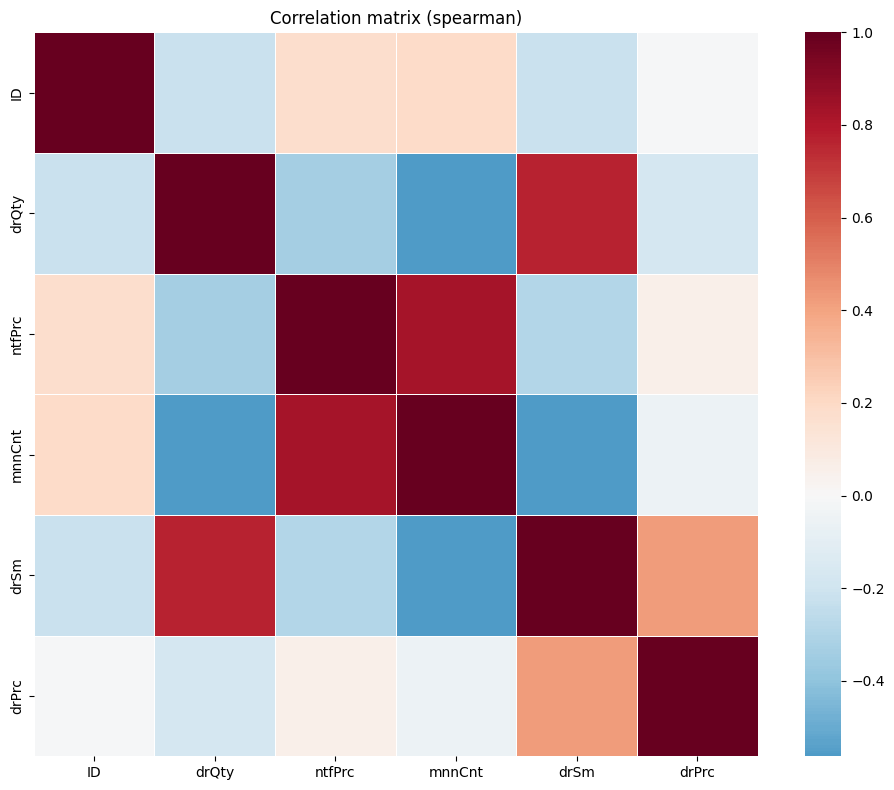

In [23]:
plot_corr_sns(data)